# Simulation Result - The Attention Distribution

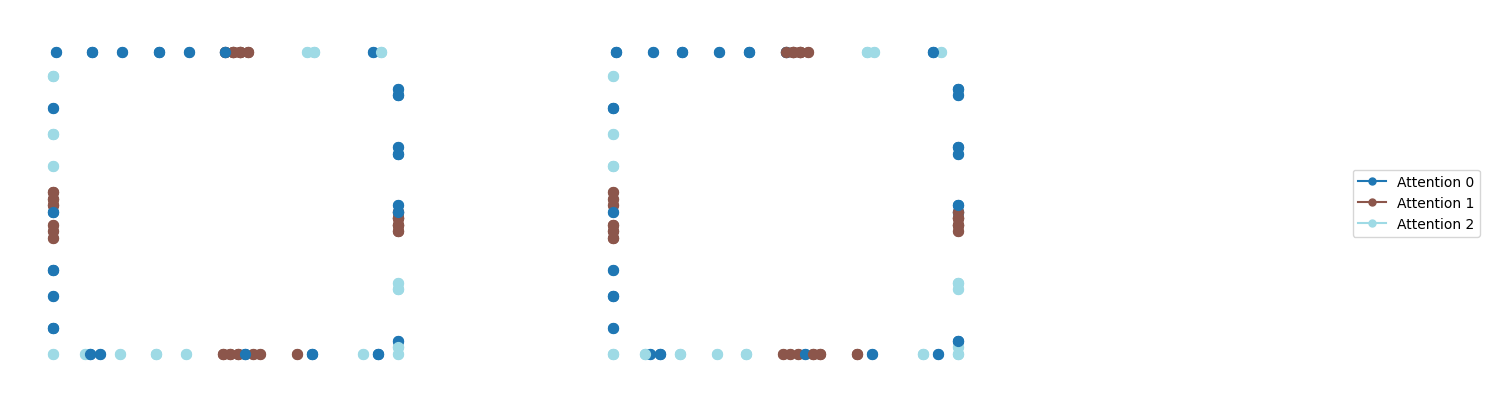

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# Load the updated CSV file to get the data
file_path_updated = 'study4_data.csv'
data_updated = pd.read_csv(file_path_updated)

# Function to convert string representations of lists into actual lists
def literal_eval_col(col):
    return col.apply(literal_eval)

# Apply the literal_eval function to the columns that contain string representations of lists
data_updated['steps'] = literal_eval_col(data_updated['steps'])
data_updated['step_wise_walking_positions'] = literal_eval_col(data_updated['step_wise_walking_positions'])
data_updated['step_wise_walking_speeds'] = literal_eval_col(data_updated['step_wise_walking_speeds'])
data_updated['step_wise_attentions'] = literal_eval_col(data_updated['step_wise_attentions'])

# Extract the walking positions and attentions for each step
walking_positions = np.concatenate(data_updated['step_wise_walking_positions'].tolist())
attentions = np.concatenate(data_updated['step_wise_attentions'].tolist())

# Extract the walking positions and attentions for each step - Only use one row in the dataset
walking_positions = 

# Map the attentions to indices and colors
attention_to_index = {att: idx for idx, att in enumerate(set(attentions))}
attention_indices = [attention_to_index[att] for att in attentions]
unique_attention_indices = sorted(set(attention_indices))
colors = plt.cm.get_cmap('tab20', len(unique_attention_indices))
attention_colors = {index: colors(i) for i, index in enumerate(unique_attention_indices)}

# Define dimensions for the visualization
height = 7
width = 8
perimeter = 2 * (width + height)

# Create the figure and axes with more space between the rectangles
fig, ax = plt.subplots(figsize=(15, 7))

# Function to plot the attentions based on walking positions on the rectangles
def plot_attentions_on_rectangle(ax, walking_positions, attentions, perimeter, width, height, offset_x):
    # Normalize walking positions to the scale of the rectangle perimeter
    normalized_positions = [pos % perimeter for pos in walking_positions]
    
    for pos, att_index in zip(normalized_positions, attentions):
        # Determine the position on the rectangle
        pos_x, pos_y = calculate_rectangle_position(pos, width, height, perimeter // 4)
        pos_x += offset_x  # Adjust x position for the second rectangle
        color = attention_colors[att_index]
        # Draw a small rectangle or a dot for the attention allocation
        ax.scatter(pos_x, pos_y, color=color, s=50)  # s is the size of the dot

# Calculate the offset for the second rectangle
second_rect_offset = width + 5  # 5 units of space between rectangles

# Plot attentions on the first rectangle
plot_attentions_on_rectangle(ax, walking_positions[:len(walking_positions)//2],
                             attention_indices[:len(walking_positions)//2], perimeter, width, height, 0)

# Plot attentions on the second rectangle with an offset
plot_attentions_on_rectangle(ax, walking_positions[len(walking_positions)//2:],
                             attention_indices[len(walking_positions)//2:], perimeter, width, height, second_rect_offset)

# Set the plot limits
ax.set_xlim(-1, 2 * width + second_rect_offset + 1)  # Adjust for spacing between rectangles and borders
ax.set_ylim(-1, height + 1)

# Keep the aspect ratio square
ax.set_aspect('equal')

# Remove axis labels and ticks
ax.axis('off')

# Add a legend for the attentions
attention_legend_handles = [
    plt.Line2D([0], [0], marker='o', color=color, label=f'Attention {idx}', markersize=5)
    for idx, color in attention_colors.items()
]

ax.legend(handles=attention_legend_handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

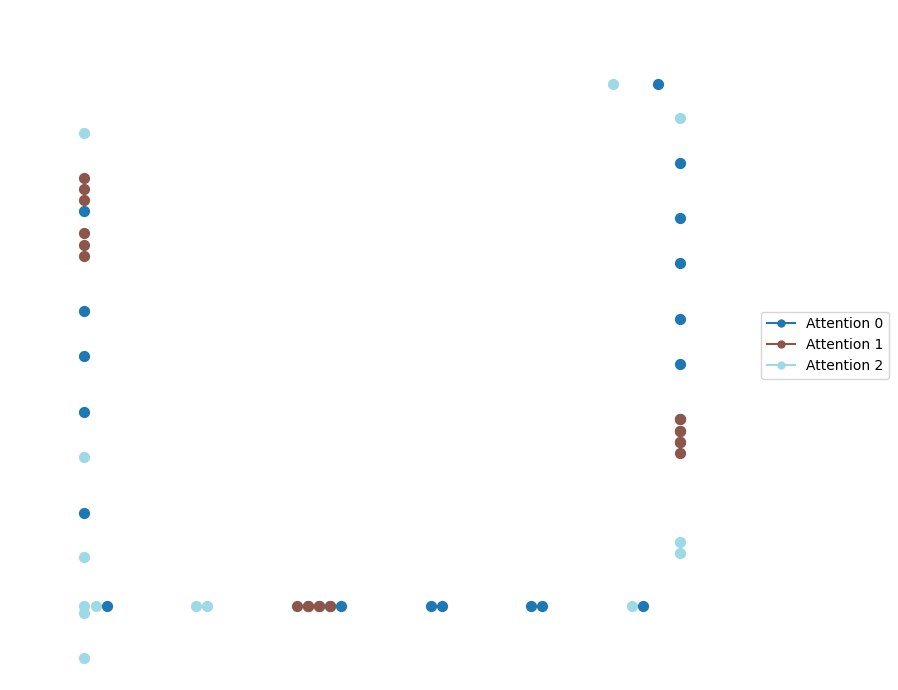

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# Load the updated CSV file to get the data for a specific row
file_path_updated = 'study4_data.csv'
data_updated = pd.read_csv(file_path_updated)

# Function to convert string representations of lists into actual lists
def literal_eval_col(col):
    return col.apply(literal_eval)

# Apply the literal_eval function to the columns that contain string representations of lists
data_updated['steps'] = literal_eval_col(data_updated['steps'])
data_updated['step_wise_walking_positions'] = literal_eval_col(data_updated['step_wise_walking_positions'])
data_updated['step_wise_walking_speeds'] = literal_eval_col(data_updated['step_wise_walking_speeds'])
data_updated['step_wise_attentions'] = literal_eval_col(data_updated['step_wise_attentions'])

# Assume we are using the first row (index 0)
row_index = 0
walking_positions_row = data_updated.at[row_index, 'step_wise_walking_positions']
attentions_row = data_updated.at[row_index, 'step_wise_attentions']

# Map the attentions to indices and colors for the selected row
attention_to_index_row = {att: idx for idx, att in enumerate(set(attentions_row))}
attention_indices_row = [attention_to_index_row[att] for att in attentions_row]
unique_attention_indices_row = sorted(set(attention_indices_row))
colors_row = plt.cm.get_cmap('tab20', len(unique_attention_indices_row))
attention_colors_row = {index: colors_row(i) for i, index in enumerate(unique_attention_indices_row)}

# Define dimensions for the visualization
height = 7
width = 8
perimeter = 2 * (width + height)

# Function to calculate the position on the rectangle based on the step
def calculate_position(step, length, width, steps_per_side):
    if step < length:
        return step, 0
    elif step < length + width:
        return length, step - length
    elif step < length * 2:
        return length - (step - (length + width)), width
    else:  # Last side of the rectangle
        return 0, width - (step - (length * 2))

# Create the figure and axes with more space between the rectangles
fig, ax = plt.subplots(figsize=(15, 7))

# Function to plot the attentions based on walking positions on the rectangles for a single row of data
def plot_attentions_on_rectangle_single_row(ax, walking_positions, attentions, perimeter, width, height, offset_x):
    # Normalize walking positions to the scale of the rectangle perimeter
    normalized_positions = [pos % perimeter for pos in walking_positions]
    
    for pos, att_index in zip(normalized_positions, attentions):
        # Determine the position on the rectangle
        pos_x, pos_y = calculate_position(pos, width, height, perimeter // 4)
        pos_x += offset_x  # Adjust x position for the second rectangle
        color = attention_colors_row[att_index]
        # Draw a dot for the attention allocation
        ax.scatter(pos_x, pos_y, color=color, s=50)  # s is the size of the dot

# Plot attentions for the single row
plot_attentions_on_rectangle_single_row(ax, walking_positions_row, attention_indices_row, perimeter, width, height, 0)

# Set the plot limits
ax.set_xlim(-1, width + 1)
ax.set_ylim(-1, height + 1)

# Keep the aspect ratio square
ax.set_aspect('equal')

# Remove axis labels and ticks
ax.axis('off')

# Add a legend for the attentions of the single row
attention_legend_handles_row = [
    plt.Line2D([0], [0], marker='o', color=color, label=f'Attention {idx}', markersize=5)
    for idx, color in attention_colors_row.items()
]

ax.legend(handles=attention_legend_handles_row, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()